In [1]:
#Hiding the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import scale

from sklearn.feature_selection import RFE


In [3]:
#help (pd.read_csv)

### Reading the Data

In [4]:
#Read the dataset provided
#A lot of columns have values as NA. By default Python would read them as Nan
#Setting keep_default_na = False to read NA values as is
house_data_original = pd.read_csv('train.csv',encoding='ISO-8859-1')#,keep_default_na=False)

In [5]:
house_data_original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Check the records & column count of the data
house_data_original.shape

(1460, 81)

### Data Cleaning

In [7]:
#Check the columns which have some null values
(house_data_original.loc[:,house_data_original.isnull().sum()!=0]).columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
(house_data_original.loc[:,house_data_original.isnull().sum()!=0].isnull().sum()/len(house_data_original.index))*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

- As we see, there are a few columns with a lot of null values, but we cannot drop these right away as many of these are genuine values for few columns.
- From the Data Dictionary, below is the definition for these attributes<br><br>
LotFrontage   -   Linear feet of street connected to property <br>
Alley         -   Type of alley access to property (NA means No Alley Access) <br>
MasVnrType    -   Masonry veneer type, Check NA None <br>
MasVnrArea    -   Masonry veneer area in square feet <br>
BsmtQual      -   Evaluates the height of the basement (NA means no basement) <br>
BsmtCond      -   Evaluates the general condition of the basement (NA means no basement) <br>
BsmtExposure  -   Refers to walkout or garden level walls (NA means no basement) <br>
BsmtFinType1  -   Rating of basement finished area (NA means no basement) <br>
BsmtFinType2  -   Rating of basement finished area (if multiple types) (NA means no basement) <br>
Electrical    -   Electrical system (Treat nulls) <br>
FireplaceQu   -   Fireplace quality (NA means no fireplace) <br>
GarageType    -   Garage location (NA means no garage) <br>
GarageYrBlt   -   Year garage was built <br>
GarageFinish  -   Interior finish of the garage (NA means no garage) <br>
GarageQual    -   Garage quality (NA means no garage) <br>
GarageCond    -   Garage condition (NA means no garage) <br>
PoolQC        -   Pool quality (NA means No pool) <br>
Fence         -   Fence quality (NA means no fence) <br>
MiscFeature   -   Miscellaneous feature not covered in other categories (NA means None) <br>

Lets replace the null values with None for columns where NA holds significance

In [9]:
#Copy the original df to a new one
house_data_for_model = house_data_original.copy(deep=True)

In [10]:
##house_data_for_model.loc[
house_data_for_model.loc[house_data_for_model.Alley.isnull(),'Alley'] = 'None'
house_data_for_model.loc[house_data_for_model.BsmtQual.isnull(),'BsmtQual'] = 'None'
house_data_for_model.loc[house_data_for_model.BsmtCond.isnull(),'BsmtCond'] = 'None'
house_data_for_model.loc[house_data_for_model.BsmtExposure.isnull(),'BsmtExposure'] = 'None'
house_data_for_model.loc[house_data_for_model.BsmtFinType1.isnull(),'BsmtFinType1'] = 'None'
house_data_for_model.loc[house_data_for_model.BsmtFinType2.isnull(),'BsmtFinType2'] = 'None'
house_data_for_model.loc[house_data_for_model.FireplaceQu.isnull(),'FireplaceQu'] = 'None'
house_data_for_model.loc[house_data_for_model.GarageType.isnull(),'GarageType'] = 'None'
house_data_for_model.loc[house_data_for_model.GarageYrBlt.isnull(),'GarageYrBlt'] = 0
house_data_for_model.loc[house_data_for_model.GarageFinish.isnull(),'GarageFinish'] = 'None'
house_data_for_model.loc[house_data_for_model.GarageQual.isnull(),'GarageQual'] = 'None'
house_data_for_model.loc[house_data_for_model.GarageCond.isnull(),'GarageCond'] = 'None'
house_data_for_model.loc[house_data_for_model.PoolQC.isnull(),'PoolQC'] = 'None'
house_data_for_model.loc[house_data_for_model.Fence.isnull(),'Fence'] = 'None'
house_data_for_model.loc[house_data_for_model.MiscFeature.isnull(),'MiscFeature'] = 'None'

In [11]:
#Drop duplicates

house_data_for_model.drop_duplicates(inplace=True)
house_data_for_model.shape

(1460, 81)

- All rows retained. So there were no duplicates in the data

### Check for columns with null values. 

In [12]:
(house_data_for_model.loc[:,house_data_for_model.isnull().sum()!=0].isnull().sum()/len(house_data_for_model.index))*100

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

- For the above attributes, the % of nulls is far below 30%, we can impute the values for these nulls with either mean value for that attribute or the most frequent value for that attribute
- Lets check each attribute one by one

In [13]:
#Attribute LotFrontage
#train_data_for_model.loc[np.isnan(train_data_for_model.LotFrontage),'LotFrontage'] = 'None'
house_data_for_model.loc[np.isnan(house_data_for_model.LotFrontage),'LotFrontage'] = np.round(np.mean(house_data_for_model.LotFrontage))

In [14]:
#Attribute Electrical
house_data_for_model.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [15]:
#Replace with most frequent value
house_data_for_model.loc[house_data_for_model.Electrical.isnull(),'Electrical'] = 'SBrkr'
house_data_for_model.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- More than 91% of the values are Sbrkr. There is not much variance in the data of this attribute. Perhaps we can drop this from our analysis

In [16]:
house_data_for_model.drop('Electrical',axis = 1, inplace=True)

In [17]:
#Check attribute MasVnrType
house_data_for_model.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
#Tis attribute does show some variance so we can retain this and impute nulls
house_data_for_model.loc[house_data_for_model.MasVnrType.isnull(),'MasVnrType'] = 'None'
house_data_for_model.loc[np.isnan(house_data_for_model.MasVnrArea),'MasVnrArea'] = np.round(np.mean(house_data_for_model.MasVnrArea))

In [19]:
(house_data_for_model.loc[:,house_data_for_model.isnull().sum()!=0].isnull().sum()/len(house_data_for_model.index))*100

Series([], dtype: float64)

In [20]:
house_data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [21]:
#The column MoSold (Month Sold) might not add any value to us. What we actually care about is the year.
#Hence we can drop the Month column
house_data_for_model.drop('MoSold',inplace=True, axis=1)

#### Checking Correlation among independent and target variables

In [22]:
# all numeric (float and int) variables in the dataset
house_data_for_model_num = house_data_for_model.select_dtypes(include=['float64', 'int64'])
house_data_for_model_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,2008,250000


In [23]:
# pairwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(house_data_for_model_num)
#plt.show()

- Plotting pair plots will be quite hard to read, and we can rather plot correlations between variables using a heatmap that enabales us to visualise multiple correlations in one plot.

In [24]:
# correlation matrix
cor = house_data_for_model_num.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,1.000000,0.011156,-0.009616,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050196,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357042,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022893,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.021407,-0.084284
LotFrontage,-0.009616,-0.357042,1.000000,0.306689,0.234227,-0.052842,0.117555,0.082775,0.179275,0.215760,...,0.323658,0.077032,0.137435,0.009814,0.062317,0.037683,0.180867,0.001101,0.006750,0.334897
LotArea,-0.033226,-0.139781,0.306689,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103962,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234227,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410246,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052842,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127794,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117555,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314754,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082775,0.013788,0.550684,0.073741,0.592855,1.000000,0.179194,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,-0.050196,0.022893,0.179275,0.103962,0.410246,-0.127794,0.314754,0.179194,1.000000,0.263589,...,0.372571,0.159347,0.124972,-0.109848,0.018794,0.061451,0.011722,-0.029816,-0.008183,0.475248
BsmtFinSF1,-0.005024,-0.069836,0.215760,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263589,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420


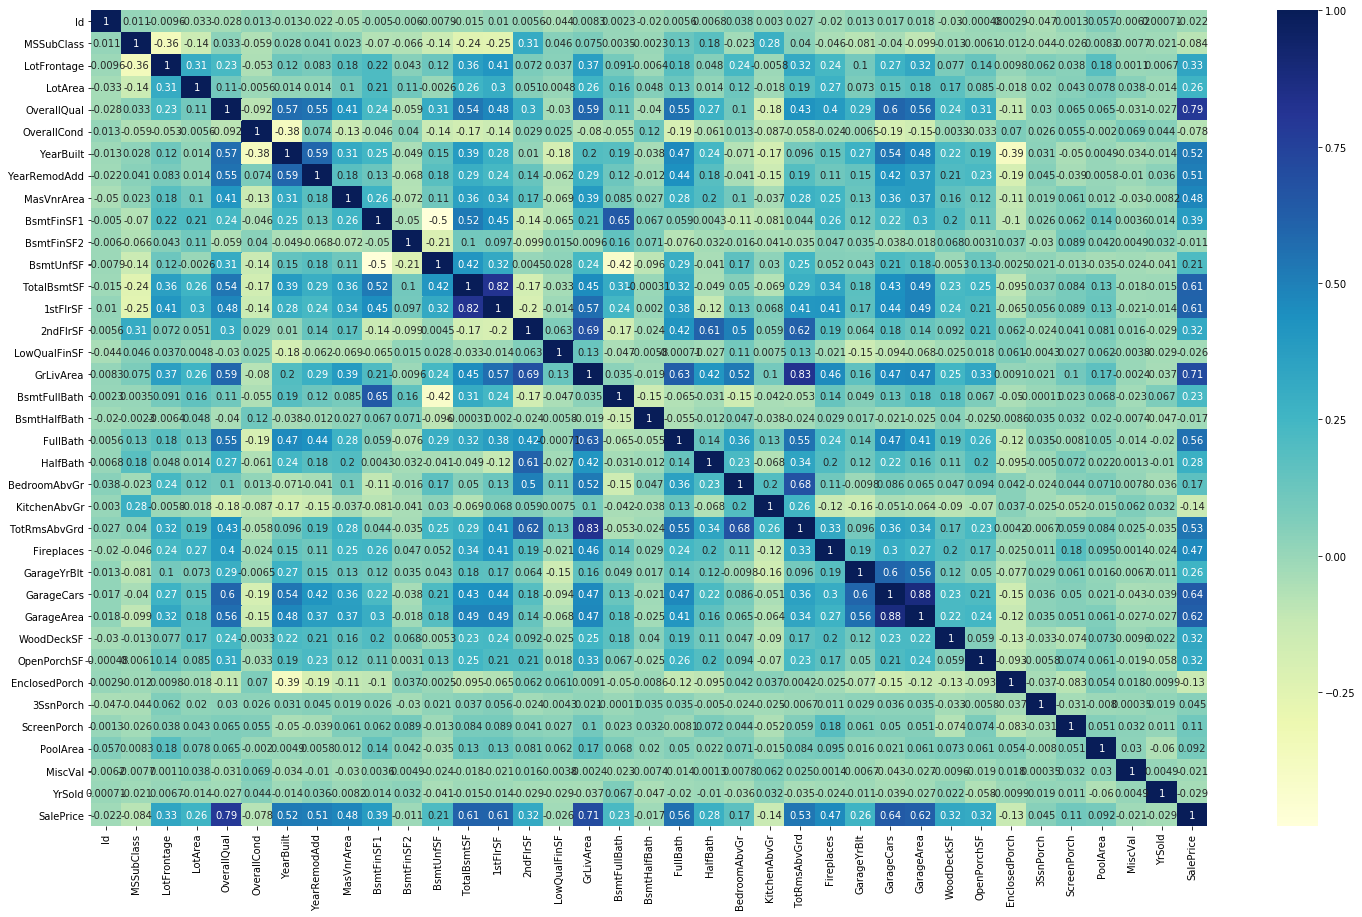

In [25]:
# plotting correlations on a heatmap to identify the co-related variables

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


#### Inference
- We can see from above heatmap that the House Sale Price is majorly dependent on variables like OverallQual, YearBuilt GrLivArea,TotalBsmtSF, 1st FlrSF, GarageCars, GarageArea, Pool Area etc.
- Some of the attributes are corelated like GrLivArea is correlated with TotRmsAbvGrand, 2ndFlrSF and many others
- We will check categorical variables also in a while and treat multicollinearity later in our model

### Data Preparation - I

#### Understanding the Target Variable
- Analyze the distribution of target attribute SalePrice and check for any anomalies

In [26]:
house_data_for_model.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- Lets visualize the values with a plot

C:\Users\bagarg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


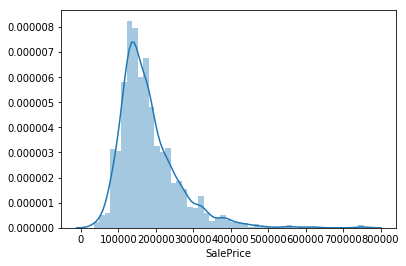

In [27]:
sns.distplot( house_data_for_model.SalePrice)

- The distribution is a bit skewed towards left. We can transform it to represent a normal distribution.
- Lets try with a very general transformation function log and see if that helps here

C:\Users\bagarg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


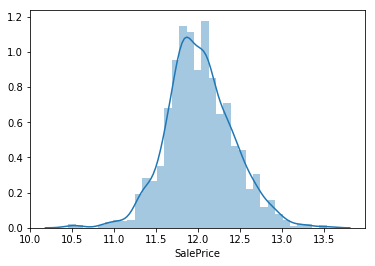

In [28]:
sns.distplot( np.log(house_data_for_model.SalePrice))

- So with log, the distribution appears close to normal. So we can use this transformation for our target variable and move ahead
- All predictions by the model will then be in log values and we will need to take the antilog ro get the actual value

In [29]:
house_data_for_model['SalePrice'] = np.log(house_data_for_model['SalePrice'])

### Outlier Analysis and treatment
- Lets also check the outliers in the data before going further so that model is not betrayed by the outliers

In [30]:
# Checking for outliers in the continuous variables
check_outliers = house_data_for_model.select_dtypes(include=['float','int64'])
check_outliers.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
# Variable MSSubClass, OverallQual, OverallCond have numeric values but are actually categorical. 
# and SalePrice is the output variable, so we can exclude this from our outlier treatment

check_outliers = check_outliers[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',\
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',\
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',\
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',\
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',\
       'MiscVal', 'YrSold']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99% fro continuous variables
check_outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.041096,10516.828082,1971.267808,1984.865753,103.686986,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753
std,22.024031,9981.264932,30.202904,20.645407,180.569114,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
50%,70.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
90%,92.000000,14381.700000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,...,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
95%,104.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,...,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,2010.000000
99%,137.410000,37567.640000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,...,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,2010.000000


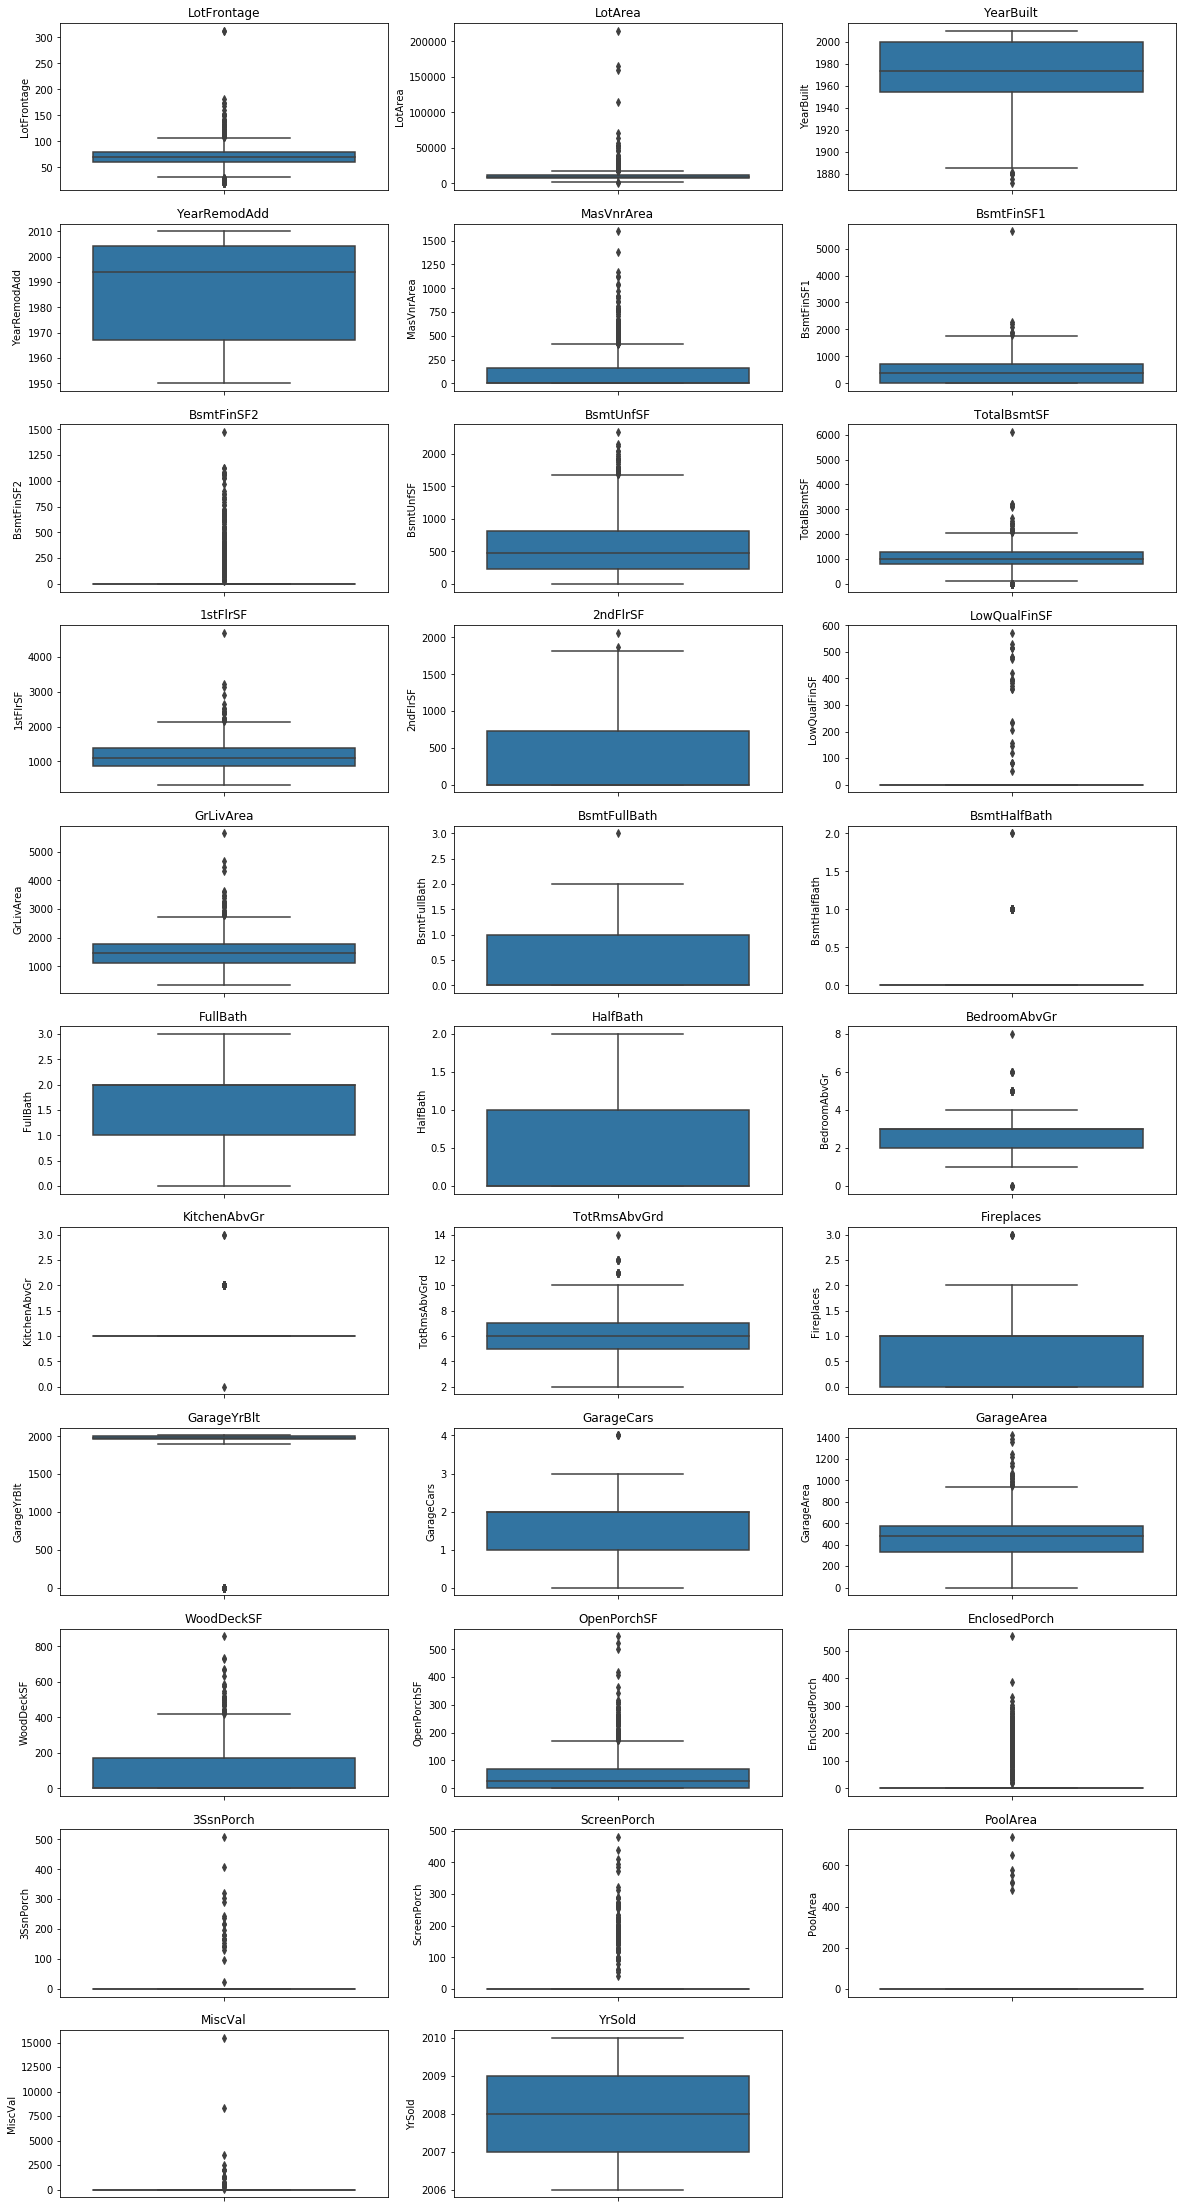

In [32]:
#lets visualize these outliers with plots
plt.figure(figsize=(20,40))
#plt.subplot(13,3,1)
sns.boxplot(y=house_data_for_model.LotArea,data=house_data_for_model)
j=1
for col in check_outliers.columns:
    plt.subplot(11,3,j)
    sns.boxplot(y=house_data_for_model[col],data=house_data_for_model)
    plt.title(col)
    j+=1

plt.show()

- LotArea & GarageArea have a lot of outliers. Lets treat those and keep the in range values

In [33]:
Q1 = house_data_for_model.LotArea.quantile(0.05)
Q3 = house_data_for_model.LotArea.quantile(0.95)
IQR = Q3 - Q1
house_data_for_model = house_data_for_model.loc[(house_data_for_model.LotArea>= Q1) & (house_data_for_model.LotArea<= Q3)]

Q1 = house_data_for_model.GarageArea.quantile(0.05)
Q3 = house_data_for_model.GarageArea.quantile(0.95)
IQR = Q3 - Q1
house_data_for_model = house_data_for_model.loc[(house_data_for_model.GarageArea>= Q1) & (house_data_for_model.GarageArea<= Q3)]


In [34]:
len(house_data_for_model)

1248

- We have lost close to 200 records with removing outliers for 2 variables which had the most outliers. 
- Treating for further variables will drop the dataset count more. Lets retain those for now and proceed with model building

In [35]:
#PoolArea, MiscVal, ScreenPorch, 3SsnPorch, EnclosedPorch, WoodDeckSF, OpenPorchSF, GarageYrBlt, KitchenAbvGr, BsmtHalfBath, GrLivArea, LowQualFinSF, TotalBsmtSF, BsmtFinSF2, BsmtUnfSF, BsmtFinSF1

#### Handling Categorical Variables
- Lets encoode categorical variables into numeric codes
- We also need create dummies for some categorical variables and convert them to numerical form before building the model

In [36]:
##for col in cat_columns:
  ##  print("Value counts for ",col,": ")
   ## print(house_data_for_model[col].value_counts())

- As per the data dictionary shared, there are a bunch of categorical columns for which the values are ordinal
- Instead of generating dummy values for those, we can encode them in numeric values

ExterQual: Evaluates the quality of the material on the exterior <br>
ExterCond: Evaluates the present condition of the material on the exterior<br>
HeatingQC: Heating quality and condition<br>
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       

In [37]:
house_data_for_model['HeatingQC'].value_counts()

Ex    616
TA    365
Gd    222
Fa     44
Po      1
Name: HeatingQC, dtype: int64

In [38]:
# 0 -- Po
# 1 -- Fa
# 2 - TA
# 3 -- Gd
# 4 -- Ex
house_data_for_model['ExterQual'] = house_data_for_model['ExterQual'].map({'Po': 0, 'Fa': 1,'TA':2,'Gd':3,'Ex':4}).astype(int)
house_data_for_model['ExterCond'] = house_data_for_model['ExterCond'].map({'Po': 0, 'Fa': 1,'TA':2,'Gd':3,'Ex':4}).astype(int)
house_data_for_model['HeatingQC'] = house_data_for_model['HeatingQC'].map({'Po': 0, 'Fa': 1,'TA':2,'Gd':3,'Ex':4}).astype(int)
house_data_for_model['KitchenQual'] = house_data_for_model['KitchenQual'].map({'Po': 0, 'Fa': 1,'TA':2,'Gd':3,'Ex':4}).astype(int)

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


In [39]:
house_data_for_model['GarageCond'].value_counts()

TA      1124
None      74
Fa        34
Gd         8
Po         7
Ex         1
Name: GarageCond, dtype: int64

In [40]:
# 0 -- NA (None)
# 1 -- Po
# 2 - Fa
# 3 -- TA
# 4 -- Gd
# 5 -- Ex
house_data_for_model['BsmtQual'] = house_data_for_model['BsmtQual'].map({'None':0, 'Po': 1, 'Fa': 2,'TA':3,'Gd':4,'Ex':5}).astype(int)
house_data_for_model['BsmtCond'] = house_data_for_model['BsmtCond'].map({'None':0, 'Po': 1, 'Fa': 2,'TA':3,'Gd':4,'Ex':5}).astype(int)
house_data_for_model['GarageQual'] = house_data_for_model['GarageQual'].map({'None':0, 'Po': 1, 'Fa': 2,'TA':3,'Gd':4,'Ex':5}).astype(int)
house_data_for_model['GarageCond'] = house_data_for_model['GarageCond'].map({'None':0, 'Po': 1, 'Fa': 2,'TA':3,'Gd':4,'Ex':5}).astype(int)

CentralAir: Central air conditioning

       N	No
       Y	Yes

In [41]:
house_data_for_model['CentralAir'].value_counts()

Y    1157
N      91
Name: CentralAir, dtype: int64

In [42]:
house_data_for_model['CentralAir'] = house_data_for_model['CentralAir'].map({'N':0, 'Y': 1}).astype(int)

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [43]:
# 0 -- NA (None)
# 1 - Fa
# 2 -- TA
# 3 -- Gd
# 4 -- Ex
house_data_for_model['PoolQC'] = house_data_for_model['PoolQC'].map({'None':0, 'Fa': 1,'TA':2,'Gd':3,'Ex':4}).astype(int)

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	

In [44]:
# 0 -- NA (None)
# 1 - No
# 2 -- Mn
# 3 -- Av
# 4 -- Gd
house_data_for_model['BsmtExposure'] = house_data_for_model['BsmtExposure'].map({'None':0, 'No': 1, 'Mn': 2,'Av':3,'Gd':4}).astype(int)

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
                  

In [45]:
# 0 -- NA (None)
# 1 - Unf
# 2 -- LwQ
# 3 -- Rec
# 4 -- BLQ
# 5 -- ALQ
# 6 -- GLQ
house_data_for_model['BsmtFinType1'] = house_data_for_model['BsmtFinType1'].map({'None':0, 'Unf': 1, 'LwQ': 2,'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6}).astype(int)

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
                  

In [46]:
# 0 -- NA (None)
# 1 - Po
# 2 -- Fa
# 3 -- TA
# 4 -- Gd
# 5 -- Ex
house_data_for_model['FireplaceQu'] = house_data_for_model['FireplaceQu'].map({'None':0, 'Po': 1, 'Fa': 2,'TA':3,'Gd':4,'Ex':5}).astype(int)

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [47]:
# 0 -- NA (None)
# 1 - Unf
# 2 -- RFn
# 3 -- Fin
house_data_for_model['GarageFinish'] = house_data_for_model['GarageFinish'].map({'None':0, 'Unf': 1, 'RFn': 2,'Fin':3}).astype(int)

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [48]:
# 0 -- N
# 1 - P
# 2 -- Y
house_data_for_model['PavedDrive'] = house_data_for_model['PavedDrive'].map({'N':0, 'P': 1, 'Y': 2}).astype(int)

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	

In [49]:
# 0 -- N
# 1 - P
# 2 -- Y
house_data_for_model['Street'] = house_data_for_model['Street'].map({'Grvl':0, 'Pave': 1}).astype(int)

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [50]:
house_data_for_model['Alley'].value_counts()

None    1172
Grvl      48
Pave      28
Name: Alley, dtype: int64

In [51]:
# 0 -- NA(None)
# 1 - Grvl
# 2 -- Pave
house_data_for_model['Alley'] = house_data_for_model['Alley'].map({'None':0, 'Grvl':1, 'Pave':2}).astype(int)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
    

In [52]:
# 0 -- IR3
# 1 -- IR2
# 2 -- IR1
# 3 -- Reg
house_data_for_model['LotShape'] = house_data_for_model['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}).astype(int)

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [53]:
house_data_for_model['LandSlope'].value_counts()

Gtl    1192
Mod      53
Sev       3
Name: LandSlope, dtype: int64

In [54]:
# 0 -- Sev
# 1 -- Mod
# 2 -- Gtl
house_data_for_model['LandSlope'] = house_data_for_model['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl':2}).astype(int)

In [55]:
house_data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 0 to 1459
Data columns (total 79 columns):
Id               1248 non-null int64
MSSubClass       1248 non-null int64
MSZoning         1248 non-null object
LotFrontage      1248 non-null float64
LotArea          1248 non-null int64
Street           1248 non-null int32
Alley            1248 non-null int32
LotShape         1248 non-null int32
LandContour      1248 non-null object
Utilities        1248 non-null object
LotConfig        1248 non-null object
LandSlope        1248 non-null int32
Neighborhood     1248 non-null object
Condition1       1248 non-null object
Condition2       1248 non-null object
BldgType         1248 non-null object
HouseStyle       1248 non-null object
OverallQual      1248 non-null int64
OverallCond      1248 non-null int64
YearBuilt        1248 non-null int64
YearRemodAdd     1248 non-null int64
RoofStyle        1248 non-null object
RoofMatl         1248 non-null object
Exterior1st      1248 non-nul

In [56]:
list(house_data_for_model.select_dtypes(include=['object']).columns)

['MSZoning',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType2',
 'Heating',
 'Functional',
 'GarageType',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Data Preparation - II

#### Dummy Variable creation
- For the above categorical variables we can create dummy columns

In [57]:
#Lets perform dummification of data and try to convert categorical data to numeric
cat_columns = house_data_for_model.select_dtypes(include=['object'])
cat_columns.head()

,MSZoning,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,BsmtFinType2,Heating,Functional,GarageType,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Unf,GasA,Typ,Attchd,None,None,WD,Normal
1,RL,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,None,CBlock,Unf,GasA,Typ,Attchd,None,None,WD,Normal
2,RL,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Unf,GasA,Typ,Attchd,None,None,WD,Normal
3,RL,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,None,BrkTil,Unf,GasA,Typ,Detchd,None,None,WD,Abnorml
4,RL,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Unf,GasA,Typ,Attchd,None,None,WD,Normal


In [58]:
cat_dummies = pd.get_dummies(cat_columns, drop_first=True)

In [59]:
cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [60]:
#house_data_for_model2 = house_data_for_model.copy(deep=True)
house_data_for_model.drop(cat_columns, axis=1, inplace=True)

In [61]:
house_data_for_model = pd.concat([house_data_for_model, cat_dummies], axis=1)

In [62]:
house_data_for_model.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,3,2,7,5,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,1,0,3,2,6,8,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,1,0,2,2,7,5,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,1,0,2,2,7,5,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,2,2,8,5,...,0,0,0,0,1,0,0,0,1,0


#### Deriving New metrics
- We have a variable called YearBuilt that basically tells us how old is the house.
- We can compute a new variable called House Age and drop the original varaible. 
    - This new variable House Age is more meaningful and easy to interpret

In [63]:
from datetime import datetime
current_year = datetime.now().year
house_data_for_model['HouseAge'] = current_year - house_data_for_model['YearBuilt']
house_data_for_model.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge
0,1,60,65.0,8450,1,0,3,2,7,5,...,0,0,0,1,0,0,0,1,0,16
1,2,20,80.0,9600,1,0,3,2,6,8,...,0,0,0,1,0,0,0,1,0,43
2,3,60,68.0,11250,1,0,2,2,7,5,...,0,0,0,1,0,0,0,1,0,18
3,4,70,60.0,9550,1,0,2,2,7,5,...,0,0,0,1,0,0,0,0,0,104
4,5,60,84.0,14260,1,0,2,2,8,5,...,0,0,0,1,0,0,0,1,0,19


In [64]:
house_data_for_model.drop('YearBuilt',inplace=True, axis = 1)

### Feature Standardization
- All our features denote different properties of a house and are on different scales
- We need to standardize them and get them on a common scale so that the model we build does not give heavy weightage to variables that have a high magnitude numerically

In [65]:
#Excluding target variable from set of independent variables X
#Also dropping the id column as this is just a sequence and is unique to every record in the dataset
X = house_data_for_model.drop(['Id','SalePrice'],axis=1)
Y = house_data_for_model['SalePrice']

In [66]:
#house_data_original.select_dtypes('int64').columns

In [67]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import scale

In [68]:
#help(scale)
#scaler = StandardScaler()

In [69]:
cols = X.columns
X_scaled = pd.DataFrame(scale(X))
X_scaled.columns = cols
X_scaled.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge
0,0.203521,-0.298712,-0.381035,0.049088,-0.239309,0.721310,0.211744,0.745504,-0.538392,0.913263,...,-0.063423,-0.277111,-0.049088,0.373799,-0.056705,-0.089875,-0.120972,0.451078,-0.280449,-1.100248
1,-0.872726,0.583707,0.031104,0.049088,-0.239309,0.721310,0.211744,-0.003601,2.145684,-0.380440,...,-0.063423,-0.277111,-0.049088,0.373799,-0.056705,-0.089875,-0.120972,0.451078,-0.280449,-0.208747
2,0.203521,-0.122228,0.622434,0.049088,-0.239309,-1.082688,0.211744,0.745504,-0.538392,0.865348,...,-0.063423,-0.277111,-0.049088,0.373799,-0.056705,-0.089875,-0.120972,0.451078,-0.280449,-1.034211
3,0.472583,-0.592852,0.013185,0.049088,-0.239309,-1.082688,0.211744,0.745504,-0.538392,-0.667929,...,-0.063423,-0.277111,-0.049088,0.373799,-0.056705,-0.089875,-0.120972,-2.216910,-0.280449,1.805384
4,0.203521,0.819019,1.701164,0.049088,-0.239309,-1.082688,0.211744,1.494609,-0.538392,0.769518,...,-0.063423,-0.277111,-0.049088,0.373799,-0.056705,-0.089875,-0.120972,0.451078,-0.280449,-1.001192


In [70]:
#help(scaler.fit_transform)

In [71]:
#cols = list(X_train.columns)
#X_train[cols] = scaler.fit_transform(X_train[cols])
#X_train.head()

##  Model Building and Evaluation

### Split Data to Train and Test Sets
- Before we build the model, we need to split our data into train and test sets

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
len(X_train)

873

In [75]:
len(X_test)

375

### Model Building - Ridge and Lasso Regression

Let's now try predicting House Sale prices, and perform ridge and lasso regression.

#### Ridge Regression
- With Ridge Ridge Regression we minimise the error term to attain a good accuracy with the model
- We also get a regularisation term in the model that tunes the model and avoids any overfitting or underfitting on the model. We need to pick an optimised value of the hyperparameter for this regularisation term.
- Lets begin with 5 proposed values for our hyperparameter lambda

In [76]:
# list of alphas to tune
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

- We used a 5 fold validation of the training data to train and validate the model
- Lets predict the Y values of train and test data from the model built and assess model performance

In [77]:
# predict
Y_train_pred_ridge = model_cv_ridge.predict(X_train)
print(metrics.r2_score(y_true=Y_train, y_pred=Y_train_pred_ridge))
Y_test_pred_ridge = model_cv_ridge.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=Y_test_pred_ridge))

0.9352876709225361
0.9122339323363142


- The train and test accuracies both look promising for this model.
- Lets visualize this model's performance for various values of the hyperparameter we set above (alpha above)

In [78]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014542,0.003354,0.002355,0.002140,0.001,{'alpha': 0.001},0.894168,0.882089,0.875951,0.860318,...,0.880875,0.012190,5,0.951031,0.951803,0.952335,0.954215,0.948890,0.951655,0.001736
1,0.028313,0.011700,0.008030,0.009728,0.01,{'alpha': 0.01},0.894688,0.882780,0.875879,0.863474,...,0.882013,0.011547,4,0.951024,0.951796,0.952327,0.954149,0.948875,0.951634,0.001721
2,0.020507,0.006504,0.001460,0.001001,1,{'alpha': 1.0},0.913613,0.895085,0.867141,0.884455,...,0.894546,0.017547,3,0.946727,0.948165,0.950294,0.950044,0.944636,0.947973,0.002117
3,0.013237,0.000568,0.000990,0.000060,5,{'alpha': 5.0},0.920821,0.900211,0.865279,0.890145,...,0.898915,0.020313,2,0.939176,0.941558,0.946212,0.943588,0.937802,0.941667,0.003017
4,0.012484,0.000420,0.001119,0.000474,10,{'alpha': 10.0},0.922171,0.902221,0.865132,0.892006,...,0.900123,0.020713,1,0.935092,0.937690,0.943289,0.939888,0.934100,0.938012,0.003326


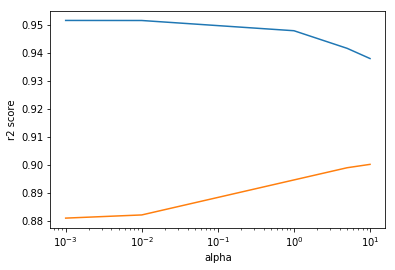

In [79]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
#plt.ylabel('Negative Mean Absolute Error')
plt.ylabel('r2 score')
#plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log')
plt.show()


- The test score seems to be best as the value of hyperparameter 10 with a decent train score also. So Lets use this as the optimal hyperparameter for Ridge and see how the model performs

In [80]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
#ridge.coef_

# predict
Y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=Y_train, y_pred=Y_train_pred))
Y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=Y_test_pred))

0.9352876709225361
0.9122339323363142


- We have a good train and test score. This is a pretty decent model. Lets check the coefficients of various features

In [81]:
# Ridge model parameters
model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
coeff_list_ridge=list(zip(cols, model_parameters_ridge))
coeff_list_ridge.sort(key = lambda coeff_list_ridge: coeff_list_ridge[1],reverse = True)
coeff_list_ridge_df = pd.DataFrame(coeff_list_ridge)
coeff_list_ridge_df.columns = ['Feature','Coefficient']
len(coeff_list_ridge_df.loc[coeff_list_ridge_df.Coefficient!=0])
#coeff_list_ridge_df

169

In [82]:
coeff_list_ridge_df

,Feature,Coefficient
0,constant,16.885
1,Neighborhood_Crawfor,0.085
2,Exterior1st_BrkFace,0.066
3,MSZoning_RL,0.065
4,SaleCondition_Normal,0.053
5,SaleCondition_Partial,0.053
6,Neighborhood_StoneBr,0.051
7,CentralAir,0.048
8,Functional_Typ,0.048
9,OverallQual,0.047


- Ridge regression gave us the model with 169 features. Lets check with Lasso now

#### Lasso
- Lets now build a model with Lass and see how does that perform

In [83]:
#from sklearn.model_selection import KFold
# grid search CV

# set up cross validation scheme
folds = 5 #KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
lasso = Lasso()
model_cv_lasso = GridSearchCV(estimator = lasso, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv_lasso.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [84]:
# predict
Y_train_pred_lasso = model_cv_lasso.predict(X_train)
print(metrics.r2_score(y_true=Y_train, y_pred=Y_train_pred_lasso))
Y_test_pred_lasso = model_cv_lasso.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=Y_test_pred_lasso))

0.9253906552872215
0.913736082046292


- The train and test scores with this model are also very good and comparable with ridge.
- Lets visualize the train and test scores for various values of the hyperparameters and find the optimum one

In [85]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030583,0.005318,0.010068,0.018068,0.001,{'alpha': 0.001},0.924727,0.899458,0.866250,0.894280,...,0.899451,0.019717,1,0.925021,0.929057,0.934602,0.930612,0.925830,0.929024,0.003460
1,0.019468,0.002957,0.001273,0.000432,0.01,{'alpha': 0.01},0.904654,0.873121,0.847910,0.877613,...,0.881114,0.020914,2,0.890691,0.897042,0.902673,0.898354,0.890994,0.895951,0.004569
2,0.021904,0.000727,0.001398,0.000490,1,{'alpha': 1.0},0.852862,0.794648,0.749496,0.816842,...,0.809530,0.035680,3,0.815793,0.822645,0.830158,0.819550,0.815935,0.820816,0.005316
3,0.022567,0.002822,0.003656,0.002543,5,{'alpha': 5.0},0.779747,0.718920,0.672528,0.715896,...,0.723279,0.034313,4,0.719254,0.737807,0.748247,0.738022,0.725988,0.733864,0.010151
4,0.018177,0.001495,0.002000,0.001139,10,{'alpha': 10.0},0.754036,0.711951,0.650015,0.694178,...,0.699858,0.033846,5,0.696815,0.716716,0.723004,0.714181,0.705253,0.711194,0.009175


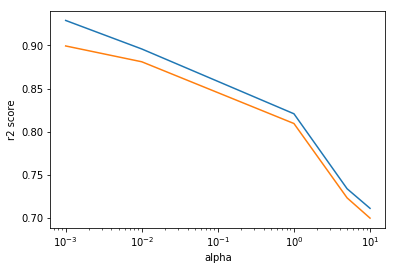

In [86]:
# plot
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

- So we see above that at value 0.001 for the hyperparameter, both the train and test scores dip drastically.
- So, 0.001 is our optimum vaue of hyperparameter with lasso regression
- Lets build the optimal model with this value

In [87]:
# model with optimal alpha
# lasso regression
lm_optimum_lasso = Lasso(alpha=0.001)
lm_optimum_lasso.fit(X_train, Y_train)

# predict
Y_train_pred = lm_optimum_lasso.predict(X_train)
print(metrics.r2_score(y_true=Y_train, y_pred=Y_train_pred))
Y_test_pred = lm_optimum_lasso.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=Y_test_pred))

0.9253906552872215
0.913736082046292


- So we see we have a good train and test R2 score
- Lets check the features and their coefficients

In [88]:
# lasso model parameters
model_parameters = list(lm_optimum_lasso.coef_)
model_parameters.insert(0, lm_optimum_lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
#list(zip(cols, model_parameters))
coeff_list_lasso=list(zip(cols, model_parameters))
coeff_list_lasso.sort(key = lambda coeff_list_lasso: coeff_list_lasso[1],reverse = True)
coeff_list_lasso_df = pd.DataFrame(coeff_list_lasso)
coeff_list_lasso_df.columns = ['Feature','Coefficient']
#len(coeff_list.loc[coeff_list.Coefficient!=0])
coeff_list_lasso_df

,Feature,Coefficient
0,constant,16.288
1,Neighborhood_Crawfor,0.101
2,SaleCondition_Partial,0.092
3,Exterior1st_BrkFace,0.066
4,SaleCondition_Normal,0.054
5,OverallQual,0.053
6,Neighborhood_Somerst,0.050
7,OverallCond,0.044
8,CentralAir,0.044
9,Neighborhood_BrkSide,0.039


In [89]:
coeff_list = pd.DataFrame(coeff_list_lasso)
coeff_list.columns = ['Feature','Coefficient']
len(coeff_list.loc[coeff_list.Coefficient!=0])


49

- Lasso Regression has given us a model with far less numbers of features (49) compared to ridge that gave us 169 features
- So we can go with lasso model for our further usage.
- But this is still not a good model having a high number of variable 49. Lets use RFE on this model to get fewer attributes that drive the Sale price of a House

## Model Building using RFE
- Lets build models using RFE and iteratively arrive at a model that gives us a good R2 score, and all variables within the acceptable VIF range

In [90]:
from sklearn.feature_selection import RFE

In [91]:
rfe = RFE(lm_optimum_lasso,15)
rfe = rfe.fit(X_train, Y_train)

In [92]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'BsmtQual', 'CentralAir', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'GarageCars', 'MSZoning_RL',
       'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_Somerst',
       'Exterior1st_BrkFace', 'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

## Building the models
- Since, we also want to see and compare the model statistics, simply using Linear Regression object would not suffice. Hence we would use statsmodel to build the models

In [93]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [94]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model - 1

In [95]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe_model1 = X_train_rfe

#adding a constant variable
X_train_rfe_model1 = sm.add_constant(X_train_rfe_model1)

#Running the linear model 1
lm1 = sm.OLS(Y_train,X_train_rfe_model1).fit()

In [96]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     304.2
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:42:33   Log-Likelihood:                 429.99
No. Observations:                 873   AIC:                            -828.0
Df Residuals:                     857   BIC:                            -751.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.31

In [97]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model1.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,55.03
6,KitchenQual,28.86
1,BsmtQual,28.45
2,CentralAir,14.90
4,FullBath,14.49
7,GarageCars,12.39
13,SaleCondition_Normal,8.53
8,MSZoning_RL,6.56
14,SaleCondition_Partial,2.10
3,BsmtFullBath,1.97


- Lot of variables have a p - value > 0.05 and VIF > 5. Lets drop one by one and see newer models

### Model 2

In [98]:
X_train_new = X_train_rfe.drop(['KitchenQual'], axis=1)

In [99]:
X_train_rfe_model2 = X_train_new

X_train_rfe_model2 = sm.add_constant(X_train_rfe_model2)

lm2 = sm.OLS(Y_train,X_train_rfe_model2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     307.6
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.19e-322
Time:                        23:42:34   Log-Likelihood:                 408.33
No. Observations:                 873   AIC:                            -786.7
Df Residuals:                     858   BIC:                            -715.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.35

In [100]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,46.37
1,BsmtQual,28.17
2,CentralAir,14.58
4,FullBath,14.26
6,GarageCars,12.20
12,SaleCondition_Normal,8.51
7,MSZoning_RL,6.53
13,SaleCondition_Partial,2.07
3,BsmtFullBath,1.96
5,HalfBath,1.72


- Still a high VIF, lets drop another variable and check. From business perspective, overall house condition would be a driving factor in house price. So lets not drop this variable, but drop the one with second hight VIF

### Model - 3

In [101]:
X_train_new = X_train_new.drop('BsmtQual',axis=1)

In [102]:
X_train_rfe_model3 = X_train_new

X_train_rfe_model3 = sm.add_constant(X_train_rfe_model3)

lm3 = sm.OLS(Y_train,X_train_rfe_model3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     315.5
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          3.20e-316
Time:                        23:42:34   Log-Likelihood:                 390.25
No. Observations:                 873   AIC:                            -752.5
Df Residuals:                     859   BIC:                            -685.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.39

In [103]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,33.58
1,CentralAir,14.21
3,FullBath,14.16
5,GarageCars,12.20
11,SaleCondition_Normal,8.31
6,MSZoning_RL,6.53
12,SaleCondition_Partial,2.01
2,BsmtFullBath,1.86
4,HalfBath,1.70
9,Neighborhood_Somerst,1.41


### Model - 4

In [104]:
X_train_new1 = X_train_new.drop('CentralAir',axis=1)

In [105]:
X_train_rfe_model4 = X_train_new1

X_train_rfe_model4 = sm.add_constant(X_train_rfe_model4)

lm4 = sm.OLS(Y_train,X_train_rfe_model4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     318.9
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.04e-306
Time:                        23:42:34   Log-Likelihood:                 364.98
No. Observations:                 873   AIC:                            -704.0
Df Residuals:                     860   BIC:                            -641.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.47

In [106]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,28.39
2,FullBath,14.13
4,GarageCars,12.18
10,SaleCondition_Normal,7.87
5,MSZoning_RL,6.03
11,SaleCondition_Partial,1.99
1,BsmtFullBath,1.84
3,HalfBath,1.70
8,Neighborhood_Somerst,1.41
6,LotConfig_CulDSac,1.09


### Model -5

In [107]:
X_train_new2 = X_train_new1.drop('FullBath',axis=1)

In [108]:
X_train_rfe_model4_1 = X_train_new2

X_train_rfe_model4_1 = sm.add_constant(X_train_rfe_model4_1)

lm4_1 = sm.OLS(Y_train,X_train_rfe_model4_1).fit()
print(lm4_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          8.17e-284
Time:                        23:42:35   Log-Likelihood:                 308.38
No. Observations:                 873   AIC:                            -592.8
Df Residuals:                     861   BIC:                            -535.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.50

In [109]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model4_1.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,20.83
3,GarageCars,11.68
9,SaleCondition_Normal,7.85
4,MSZoning_RL,5.92
10,SaleCondition_Partial,1.99
1,BsmtFullBath,1.78
2,HalfBath,1.68
7,Neighborhood_Somerst,1.40
5,LotConfig_CulDSac,1.09
6,Neighborhood_Crawfor,1.06


### Model - 6

In [110]:
X_train_new=X_train_new2

In [111]:
X_train_new = X_train_new.drop('GarageCars',axis=1)

In [112]:
X_train_rfe_model5 = X_train_new

X_train_rfe_model5 = sm.add_constant(X_train_rfe_model5)

lm5 = sm.OLS(Y_train,X_train_rfe_model5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     285.4
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.71e-265
Time:                        23:42:35   Log-Likelihood:                 262.59
No. Observations:                 873   AIC:                            -503.2
Df Residuals:                     862   BIC:                            -450.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.48

In [113]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,12.47
8,SaleCondition_Normal,7.85
3,MSZoning_RL,5.87
9,SaleCondition_Partial,1.97
1,BsmtFullBath,1.77
2,HalfBath,1.67
6,Neighborhood_Somerst,1.39
4,LotConfig_CulDSac,1.09
5,Neighborhood_Crawfor,1.05
7,Exterior1st_BrkFace,1.05


### Model - 7

In [114]:
X_train_new = X_train_new.drop('SaleCondition_Normal',axis=1)

X_train_rfe_model7 = X_train_new

X_train_rfe_model7 = sm.add_constant(X_train_rfe_model7)

lm7 = sm.OLS(Y_train,X_train_rfe_model7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     302.9
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          4.41e-260
Time:                        23:42:35   Log-Likelihood:                 247.00
No. Observations:                 873   AIC:                            -474.0
Df Residuals:                     863   BIC:                            -426.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.57

In [115]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model7.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,6.79
3,MSZoning_RL,5.65
1,BsmtFullBath,1.77
2,HalfBath,1.67
6,Neighborhood_Somerst,1.39
8,SaleCondition_Partial,1.25
4,LotConfig_CulDSac,1.09
5,Neighborhood_Crawfor,1.05
7,Exterior1st_BrkFace,1.04


### Model - 8

In [116]:
X_train_new = X_train_new.drop('MSZoning_RL',axis=1)

X_train_rfe_model8 = X_train_new

X_train_rfe_model8 = sm.add_constant(X_train_rfe_model8)

lm8 = sm.OLS(Y_train,X_train_rfe_model8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     289.7
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.39e-238
Time:                        23:42:35   Log-Likelihood:                 193.87
No. Observations:                 873   AIC:                            -369.7
Df Residuals:                     864   BIC:                            -326.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.66

- While we still see a good Adjusted - R squared and controlled AIC & BIC

In [117]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model8.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.82
1,BsmtFullBath,1.73
2,HalfBath,1.65
7,SaleCondition_Partial,1.25
5,Neighborhood_Somerst,1.21
3,LotConfig_CulDSac,1.08
4,Neighborhood_Crawfor,1.05
6,Exterior1st_BrkFace,1.04


- Though the initial R-squared has dropped, but we still have a considerable adjusted R-squared with this model. 
- So we can use this model as the final model for further use

## Conclusion
So the key factors affecting the Sale Price of a House are: 
    - Overall Quality
    - Neighbourhood
    - SaleCondition
    - LotConfig
    - Exterior1st
    - BsmtFullBath
    - HalfBath